# Практическое задание к уроку 1 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [44]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

iris_data = pd.read_csv("Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [40]:
# репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть 

In [45]:
### Шаг 3. Обученние нейронной сети

def lern_ns(param):
    w0 = 2*np.random.random((4, param['intern'])) - 1 # для входного слоя   
    w1 = 2*np.random.random((param['intern'], 3)) - 1 # для внутреннего слоя 

    # скорость обучения (learning rate)
    n = param['speed_lern']

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(param['iteration']):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска

        layer2_error =  y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    return(round(accuracy,2))

In [46]:
def test(intern,speed_lern,iteration,test_iteration,p):
    result=[]
    for i in test_iteration:
        if p=='intern':
            param={'intern':i,'speed_lern':speed_lern,'iteration':iteration}    
        elif p=='speed_lern':
            param={'intern':intern,'speed_lern':i,'iteration':iteration} 
        else:  
            param={'intern':intern,'speed_lern':speed_lern,'iteration':i}         

        answer=lern_ns(param)
        result.append(answer)
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
    plt.plot(test_iteration,result)  
    plt.xlabel(p)
    plt.ylabel('Точность')
    plt.show()   

Зависимость точности от параметров ('intern' - кол во нейронов во втором слое, 'speed_lern'- скорость обучения, 'iteration'- кол во итераций  )

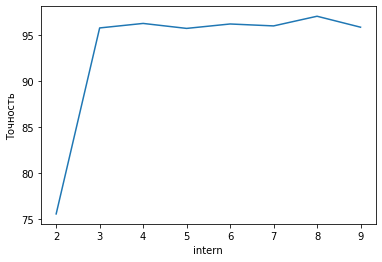

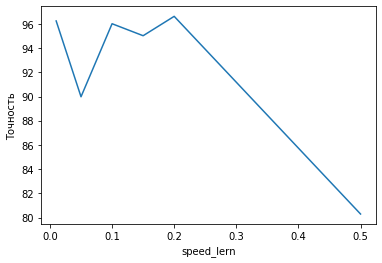

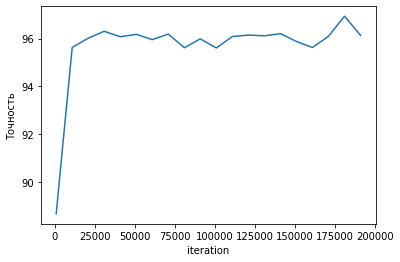

In [47]:
test(0,0.1,100000,range(2,10),'intern')
test(4,0,100000,[0.01,0.05,0.1,0.15,0.2,0.5],'speed_lern')
test(4,0.1,0,range(1000,200000,10000),'iteration')

In [43]:
param={'intern':8,'speed_lern':0.01,'iteration':100000}  
print(f'Точность нейронной сети при парам {param} : {lern_ns(param)}')

Точность нейронной сети при парам {'intern': 8, 'speed_lern': 0.01, 'iteration': 100000} : 98.56


Добавим еще один слой

In [42]:
# трехслойная нейронный сети для классификации цветков ириса

### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 8)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((8, 10)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w2 = 2*np.random.random((10, 3)) - 1 

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
   
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

      
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.99%


### Вывод 
1. При изменении параметров влияние оказывает количество нейронов в о втором слое если количество меньше количества входящих. Дальнейшее увеличение повышает точность, но не силно значимо.

2. Cкорость обучения при сильно высокой точность сети падает. т.к проскакиваем минимум

3. количество итераций  при сильно малом количестве можно просто не достигнуть минимума 
2 и 3 параметр влияет на затратность по обучению сети

4. Третий слой добавил точность при условии увеличения числа нейронов по сравнению со вторым слоем (для данного дата сета можно сказать что 3 слой детализирует признаковое пространство второго слоя) 
